# Inferential_statistics_capstone_steps

At this point, you have obtained the data set for your Capstone project, cleaned and wrangled it into a form that's ready for analysis. It's now time to apply the inferential statistics techniques you have learned to explore the data. 
For example, 
	are there variables that are particularly significant in terms of explaining the answer to your project question? 
	Are there strong correlations between pairs of independent variables, or between an independent and a dependent variable? 

Submission: Write a short report (1-2 pages) on the inferential statistics steps you performed and your findings. Check this report into your github and submit a link to it. Eventually, this report can be incorporated into your Milestone report.

As the answer to my project is 

order_id,products
17,1 2
34,None
137,1 2 3
etc.

I won't be able to perform statistical test of correlations and relationships due to not being a variable.

This led me to ask for help to the Springboard Community.

So, Andrew Maguire gave me some guidance and hints to move foward.

The result is performed in the cells below. Thanks for checking out! :-)

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import networkx as nx
import seaborn as sns
#“The Instacart Online Grocery Shopping Dataset 2017”, Accessed from https://www.instacart.com/datasets/grocery-shopping-2017 on <09-16-2017>

## 1 - Load the data
We are only loading the datasets with information about the orders carachteristics : all_orders; 
& products contained in the order: order_pdt_prior;

In [2]:
#aisles = pd.read_csv('Instacart Kaggle/aisles.csv')
#dptmts = pd.read_csv('Instacart Kaggle/departments.csv')
order_pdt_prior = pd.read_csv('Instacart Kaggle/order_products__prior.csv')
all_orders = pd.read_csv('Instacart Kaggle/orders.csv')
#train = pd.read_csv('Instacart Kaggle/order_products__train.csv')
#products = pd.read_csv('Instacart Kaggle/products.csv')
#sample_sub = pd.read_csv('Instacart Kaggle/sample_submission.csv')

In [3]:
all_orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


## 2 - Investigate Days of the Week and Hours of the Day variables

By taking a look at the variables two stand out for me: order_dow & order_hour_of_day
Lets see some charts on them.

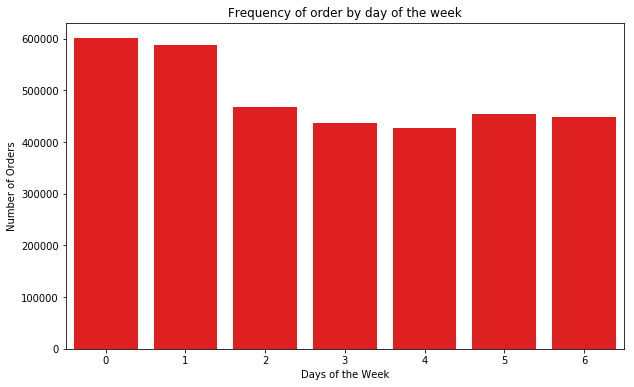

In [4]:
plt.figure(figsize=(10,6))
sns.countplot(x='order_dow', data= all_orders, color='r')
plt.title('Frequency of order by day of the week')
plt.xlabel('Days of the Week')
plt.ylabel('Number of Orders')

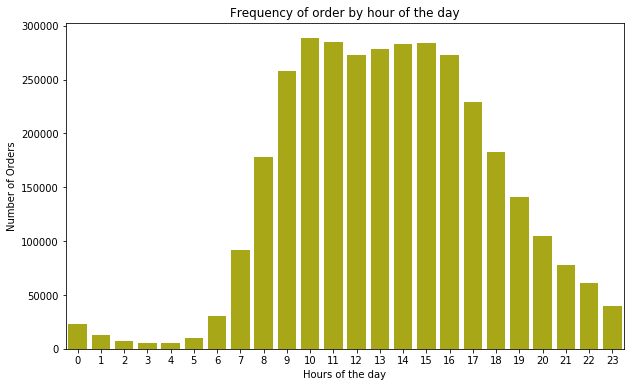

In [5]:
plt.figure(figsize=(10,6))
sns.countplot(x='order_hour_of_day', data= all_orders, color= 'y')
plt.title('Frequency of order by hour of the day')
plt.xlabel('Hours of the day')
plt.ylabel('Number of Orders')

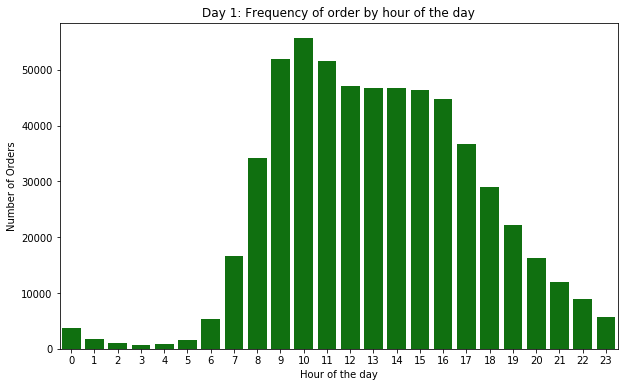

In [6]:
# Every day have similar pattern except day 1, take a look at the peak bars and compare with the chart above
a = all_orders[all_orders.order_dow == 1]
plt.figure(figsize=(10,6))
sns.countplot(x='order_hour_of_day', data= a, color= 'g')
plt.title('Day 1: Frequency of order by hour of the day')
plt.xlabel('Hour of the day')
plt.ylabel('Number of Orders')

In [7]:
order_pdt_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [8]:
o = order_pdt_prior
o = o.drop('product_id', axis=1)
o = o.drop('reordered', axis=1)
o = o.groupby('order_id').max()
o = o.rename(columns = {'add_to_cart_order': 'n_items'})
o = o.reset_index()
o.head()

,order_id,n_items
0,2,9
1,3,8
2,4,13
3,5,26
4,6,3


In [9]:
a = all_orders
a = a.drop(['user_id', 'eval_set', 'order_number'], axis=1)
a.head()

,order_id,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,2,8,NaN
1,2398795,3,7,15.0
2,473747,3,12,21.0
3,2254736,4,7,29.0
4,431534,4,15,28.0


In [10]:
oa = pd.merge(o , a, on='order_id')
oa.head()

,order_id,n_items,order_dow,order_hour_of_day,days_since_prior_order
0,2,9,5,9,8.0
1,3,8,5,17,12.0
2,4,13,1,9,7.0
3,5,26,6,16,9.0
4,6,3,1,12,30.0


In [11]:
len(oa)

3214874

In [12]:
pd.unique(oa.order_dow)

array([5, 1, 6, 2, 4, 0, 3], dtype=int64)

In [13]:
dow_0 = oa[oa.order_dow == 0]
dow_1 = oa[oa.order_dow == 1]
dow_2 = oa[oa.order_dow == 2]
dow_3 = oa[oa.order_dow == 3]
dow_4 = oa[oa.order_dow == 4]
dow_5 = oa[oa.order_dow == 5]
dow_6 = oa[oa.order_dow == 6]

In [14]:
dow_0 = dow_0.n_items
dow_1 = dow_1.n_items
dow_2 = dow_2.n_items
dow_3 = dow_3.n_items
dow_4 = dow_4.n_items
dow_5 = dow_5.n_items
dow_6 = dow_6.n_items

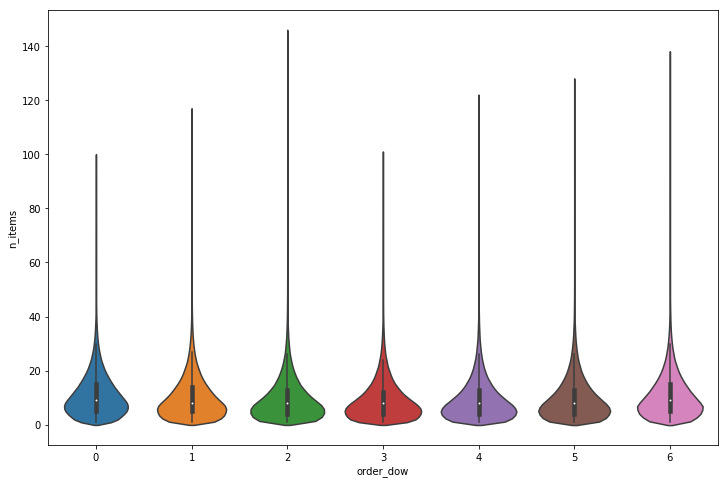

In [15]:
plt.figure(figsize=(12,8))
sns.violinplot(x='order_dow', y= 'n_items', data=oa)

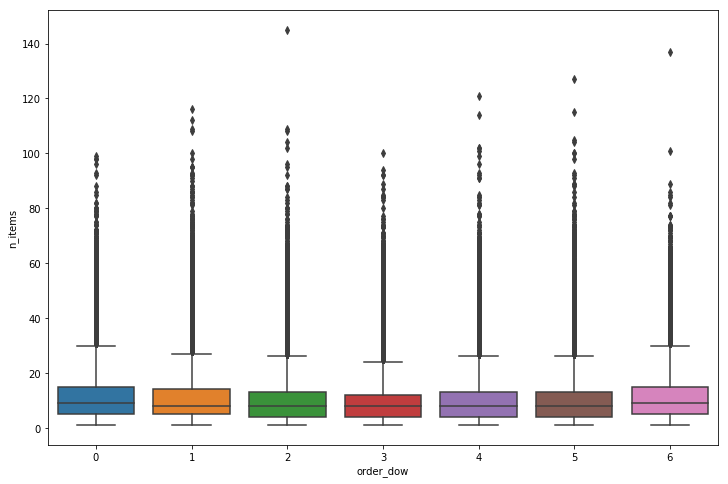

In [16]:
plt.figure(figsize=(12,8))
sns.boxplot(x='order_dow', y= 'n_items', data=oa)

In [17]:
pd.unique(oa.order_hour_of_day)

array([ 9, 17, 16, 12, 14,  6, 19,  8, 15, 11, 20, 18, 10, 13,  0, 22, 21,
        7,  1, 23,  2,  4,  5,  3], dtype=int64)

In [18]:
hod_0 = oa[oa.order_hour_of_day == 0]
hod_1 = oa[oa.order_hour_of_day == 1]
hod_2 = oa[oa.order_hour_of_day == 2]
hod_3 = oa[oa.order_hour_of_day == 3]
hod_4 = oa[oa.order_hour_of_day == 4]
hod_5 = oa[oa.order_hour_of_day == 5]
hod_6 = oa[oa.order_hour_of_day == 6]
hod_7 = oa[oa.order_hour_of_day == 7]
hod_8 = oa[oa.order_hour_of_day == 8]
hod_9 = oa[oa.order_hour_of_day == 9]
hod_10 = oa[oa.order_hour_of_day == 10]
hod_11 = oa[oa.order_hour_of_day == 11]
hod_12 = oa[oa.order_hour_of_day == 12]
hod_13 = oa[oa.order_hour_of_day == 13]
hod_14 = oa[oa.order_hour_of_day == 14]
hod_15 = oa[oa.order_hour_of_day == 15]
hod_16 = oa[oa.order_hour_of_day == 16]
hod_17 = oa[oa.order_hour_of_day == 17]
hod_18 = oa[oa.order_hour_of_day == 18]
hod_19 = oa[oa.order_hour_of_day == 19]
hod_20 = oa[oa.order_hour_of_day == 20]
hod_21 = oa[oa.order_hour_of_day == 21]
hod_22 = oa[oa.order_hour_of_day == 22]
hod_23 = oa[oa.order_hour_of_day == 23]

In [19]:
hod_0 = hod_0.n_items
hod_1 = hod_1.n_items
hod_2 = hod_2.n_items
hod_3 = hod_3.n_items
hod_4 = hod_4.n_items
hod_5 = hod_5.n_items
hod_6 = hod_6.n_items
hod_7 = hod_7.n_items
hod_8 = hod_8.n_items
hod_9 = hod_9.n_items
hod_10 = hod_10.n_items
hod_11 = hod_11.n_items
hod_12 = hod_12.n_items
hod_13 = hod_13.n_items
hod_14 = hod_14.n_items
hod_15 = hod_15.n_items
hod_16 = hod_16.n_items
hod_17 = hod_17.n_items
hod_18 = hod_18.n_items
hod_19 = hod_19.n_items
hod_20 = hod_20.n_items
hod_21 = hod_21.n_items
hod_22 = hod_22.n_items
hod_23 = hod_23.n_items

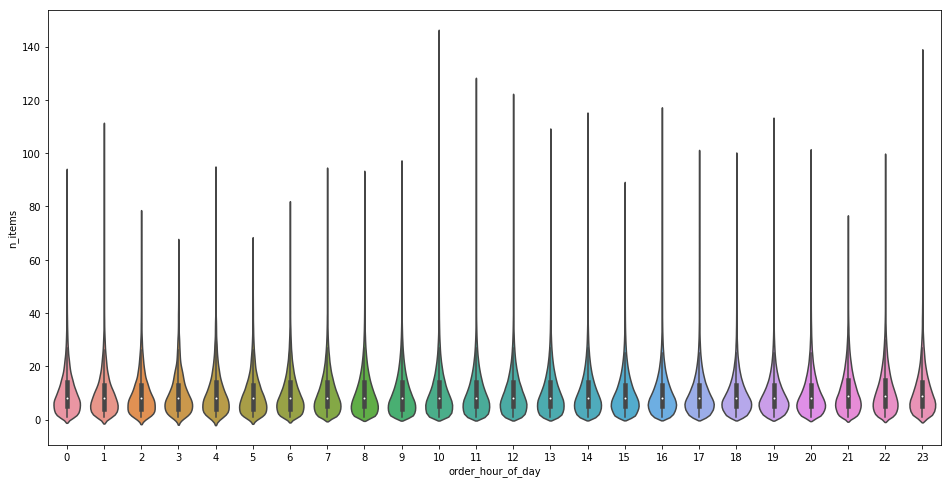

In [20]:
plt.figure(figsize=(16,8))
sns.violinplot(x='order_hour_of_day', y= 'n_items', data=oa)

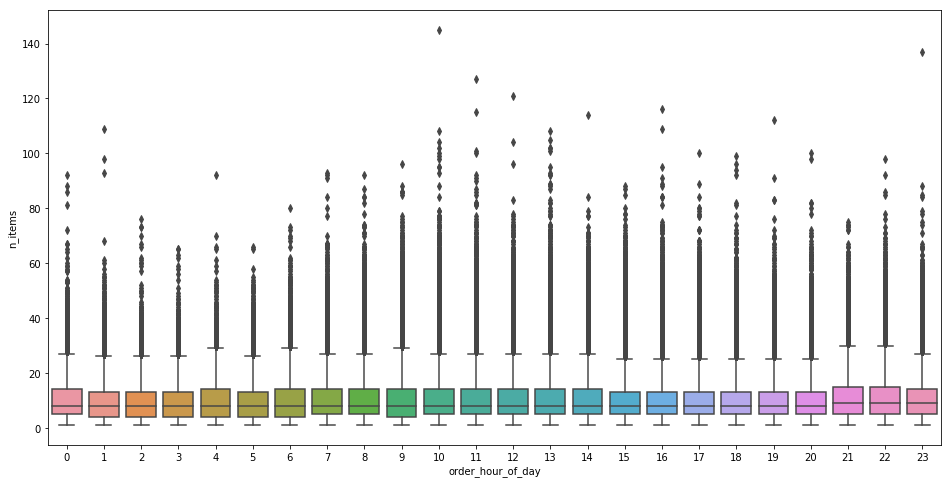

In [21]:
plt.figure(figsize=(16,8))
sns.boxplot(x='order_hour_of_day', y= 'n_items', data=oa)

## 3 - Hypothesis testing

A statistical hypothesis is an assumption about a population parameter. This assumption may or may not be true. Hypothesis testing refers to the formal procedures used by statisticians to accept or reject statistical hypotheses.

After looking the charts above, we will check if the assumption about the population is statistically significant.

Definition of questions:

(1) The number of items per order is statistically different across days of the week?

(2) The number of items per order is statistically different across hours of the day?

Definition of tests:

(1) Anova

(2) Anova

Set up tests:

(1) select n_items_order in every weekday -> run stats.f_oneway -> analyze p-value
(2) select n_items_order in every hour of day -> run stats.f_oneway -> analyze p-value

Null Hypothesis:

(1) Mean dow0 = Mean dow_1 = Mean dow_2 = Mean dow_3 = Mean dow_4 = Mean dow_5 = Mean dow_6

(2) Similar to above, all means are of hour of day (hod) are equal

In [22]:
import scipy.stats as stats
stats.f_oneway(dow_0, dow_1, dow_2, dow_3, dow_4, dow_5, dow_6)

F_onewayResult(statistic=4015.6412134991238, pvalue=0.0)

In [23]:
import scipy.stats as stats
stats.f_oneway(hod_0, hod_1, hod_2, hod_3, hod_4, hod_5, hod_6, hod_7, hod_8, hod_9, hod_10, hod_11, hod_12,\
               hod_13, hod_14, hod_15, hod_16, hod_17, hod_18, hod_19, hod_20, hod_21, hod_22, hod_23)

F_onewayResult(statistic=188.35913046033031, pvalue=0.0)

Explain results:

(1) we reject the null hypothesis where the means of every day of the week was equal in number of items per order, as the P-value is equal to 0. So, every day of the week does not have the same mean of number of items in per order.

(2) we reject the null hypothesis where the means of every hour of the day was equal in number of items per order, as the P-value is equal to 0. So, every hour of the day does not have the same mean of number of items in per order.

## 4 - Correlation

We will see if the variables in the merged dataset are correlated.

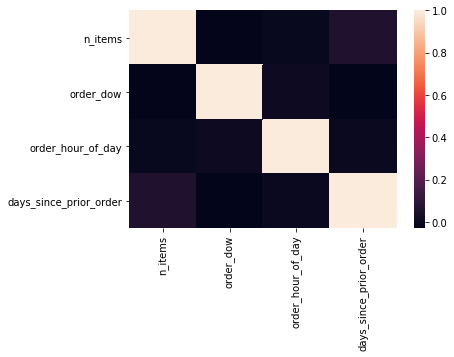

In [24]:
oa_t = oa.drop('order_id', axis=1)
corr = oa_t.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [25]:
corr

,n_items,order_dow,order_hour_of_day,days_since_prior_order
n_items,1.000000,-0.024653,-0.005865,0.059389
order_dow,-0.024653,1.000000,0.006274,-0.028700
order_hour_of_day,-0.005865,0.006274,1.000000,0.000053
days_since_prior_order,0.059389,-0.028700,0.000053,1.000000


Explain results:

As shown above, all values are close to 0, revealing no correlations between this variables

## 5 - Social Network Analysis

During the Exploratory Data Analysis I've found a cluster of products related to Social Events (plates, organic avocado, diet ginger soda, etc), you can see how I got to this finding on my EDA notebook.

So the idea here is to respond this question:

  -Is there a significant difference in proportions of "% social in basket" between weekdays and weekends?

Definition of test:

  -Difference in proportions

Set up tests:

  -de_para product_id e social events -> criar metrica % social in order -> import numpy as np & from statsmodels.stats.proportion import proportions_ztest

In [26]:
clusters = pd.read_csv('Instacart Kaggle/modularity_class_user_product.csv')

In [27]:
clusters.head()

,Id,Label,timeset,d0,Degree,modularity_class
0,31789,NaN,NaN,product,10,0
1,43758,NaN,NaN,product,69,0
2,23405,NaN,NaN,product,21,0
3,9786,NaN,NaN,product,16,0
4,7139,NaN,NaN,product,40,0


In [28]:
clusters = clusters.drop(['Label', 'timeset', 'd0'], axis=1)
clusters = clusters.drop([2394, 2943, 2993], axis = 0)
clusters = clusters.drop([1646, 1719, 2820], axis = 0)
clusters = clusters.rename(columns = {'Id': 'product_id'})

In [29]:
#clusters['modularity_class'].replace(0, 'Social',inplace=True)
#clusters['modularity_class'].replace(1, 'Wellness',inplace=True)

In [30]:
clusters.groupby('modularity_class').count()

,product_id,Degree
modularity_class,,
0,390,390
1,2682,2682


In [31]:
clusters.head()

,product_id,Degree,modularity_class
0,31789,10,0
1,43758,69,0
2,23405,21,0
3,9786,16,0
4,7139,40,0


In [32]:
social = clusters[clusters.modularity_class == 0]
social = social.product_id
test = order_pdt_prior[order_pdt_prior['product_id'].isin(social)]

In [33]:
test.head()

,order_id,product_id,add_to_cart_order,reordered
7,2,1819,8,1
184,21,33106,2,1
226,25,39046,8,0
231,25,37449,13,0
326,37,33059,2,0


In [34]:
orders_w_social = pd.unique(test.order_id)

In [35]:
len(orders_w_social)

488815

In [36]:
orders_w_social_df = all_orders[all_orders['order_id'].isin(orders_w_social)]

In [37]:
len(orders_w_social_df)

488815

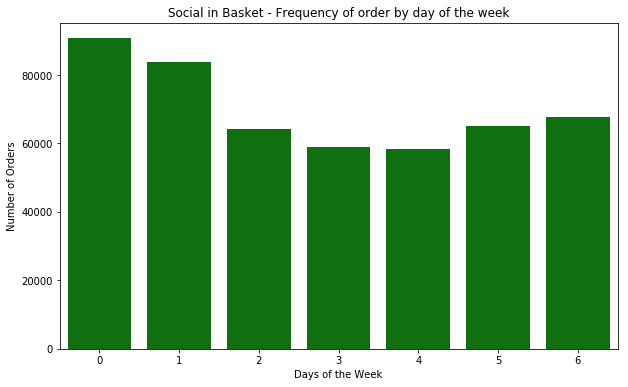

In [38]:
plt.figure(figsize=(10,6))
sns.countplot(x='order_dow', data= orders_w_social_df, color='g')
plt.title('Social in Basket - Frequency of order by day of the week')
plt.xlabel('Days of the Week')
plt.ylabel('Number of Orders')

## 5.1 Hypothesis Test on Weekends vs Weekdays

Null Hypothesis:

P1 : the proportion of orders cointaining social event's products on weekends
P2 : the proportion of orders cointaining social event's products on weekdays

P1 = P2

Alternative Hypothesis:
P1 != P2

For this analysis, the significance level is 0.05. The test method is a two-proportion z-test.

p1: success on weekends
n1: number observations on weekends
p2: success on weekdays
n2: number observations on weekdays

p = (p1 * n1 + p2 * n2) / (n1 + n2)

SE = sqrt{ p * ( 1 - p ) * [ (1/n1) + (1/n2) ] }


In [39]:
#p1: success on weekends
p1 = len(orders_w_social_df.loc[(orders_w_social_df.order_dow == 0) | (orders_w_social_df.order_dow == 1)])
p1

174473

In [40]:
#n1: number observations on weekends
n1 = len(all_orders.loc[(all_orders.order_dow == 0) | (all_orders.order_dow == 1)])
n1

1188383

In [41]:
#p2: success on weekdays
p2 = len(orders_w_social_df.loc[(orders_w_social_df.order_dow != 0) & (orders_w_social_df.order_dow != 1)])
p2

314342

In [42]:
#n2: number observations on weekdays
n2 = len(all_orders.loc[(all_orders.order_dow != 0) & (all_orders.order_dow != 1)])
n2

2232700

In [43]:
import statsmodels.api as sm
zscore, pvalue = sm.stats.proportions_ztest([p1, p2], [n1, n2])
zscore

C:\Users\LUCILA\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


15.163034559239357

In [44]:
pvalue

6.2131086359043612e-52

In [45]:
from scipy.stats import norm
critical_value = norm.ppf(1-(0.05/2))

In [46]:
zscore < critical_value

False

Our Conclusion

Since the z-score of 15.16 exceeds the critical value of 1.96, we reject the null hypothesis that the difference between the two proportions is no different from zero. 